---
title: "Writing Stable Diffusion from Scratch 10"
reading-time: 
date: "2023-4-2"
categories: [fastaipart2,Stable-Diffusion]
---

All credits goes to fast.ai All mistakes are mine.
You should know and practice following after this blog post : 
1- Convolution in concept and in coding

In [ ]:
!pip install -Uqq git+https://github.com/fastai/course22p2


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.4/158.4 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 kB 10.2 MB/s eta 0:0

Hi, all, and welcome to lesson 15. And what we're going to endeavor to do today is to create a convolutional auto encoder. And in the process, we will see why doing that well is a tricky thing to do. And time permitting, we will begin to work on a framework, a deep learning framework to make life a lot easier. Not sure how far we'll get on that today. Time wise, let's see how we go and get straight into it. So, okay, so today let's start by talking before we can create a convolutional auto encoder we need to talk about convolutions and and what are they and what are they for.

Broadly speaking, convolutions are something that allows us to to tell our neural network a little bit about the structure of the problem. That's going to make it a lot easier for it to solve the problem. And in particular, the structure of our problem is we're doing things with images. Images are laid out on a grid, a 2D grid with black and white, or a 3 to 4 color or a 44 color video or whatever. And so we would say, you know, there's a relationship between the pixels going across the pixels going down. They tend to be similar to each other. Differences in those pixels across those dimensions tend to have meaning . Patterns of pixels that appear in different places often represent the same thing. So, for example, a cat in the top left is still a cat, even if it's in the bottom right. These kinds of this kind of prior information is something that is naturally captured by a convolutional neural network, something that is convolutions. Generally speaking, this is a good thing because it means that we will be able to use less parameters and less computation, and because more of that information about the problem solving is kind of encoded directly into our architecture.Maybe I should plug my other life her. Let me do that as well as how to get enough light. Okay. Let me say yes, there are other architectures that don't encode that prior information as strongly, such as a multilayer perceptron, which we've been looking at so far, or a Transformers network, which we haven't looked at yet. 

Those kinds of architectures could potentially give us what they do, give us more flexibility and given enough time, compute and data, they could potentially find things that maybe CNN's would struggle to find. So we're not always going to use convolutional neural networks, but they're pretty good starting point and certainly something important to understand. They're not just used for images. We can also take advantage of one dimensional convolutions for language based tasks. For instance, the convolutions come up a lot. So in this notebook, one thing you'll notice that might be of interest is we are importing stuff from miniai now. Now miniai is this little library that we're starting to create and we're creating nbdev. So we've got a miniai training and a mini A.I. data sets. And so if we look, for example, at the Datasets notebook, it starts with something that says that the default export module is called datasets, and some of the cells have a export directive on them. And at the very bottom we had something that called nbdev export. Now what that's going to do is it's going to create a file called dataset.py Just here, datasets.py why and it contains that's those cells that we exported. And why does it why is it called miniai.datasets? That's because everything miniai is stored in settings.mini and there's something here. So create a library lib_name called miniai. I you can't use this library until you install it. Now we haven't uploaded it to 2  the pipi installable package from the public server, but you can actually install a local directory as if it's a python module that you've kind of installed from the internet. And to do that you say pip install in the usual way, but you say minus e is set to editable and that means set up the current directory as a python module. Well, current directory actually any directory you like. I just put dot to be in the current directory and so you'll see that's going to go ahead and actually install all my library. And so after I've done that I can now import things from that library, as you say. Okay, so this is just the same as before. We're going to grab Our MNIST data set and we're going to create a convolutional neural network on it. So before we do that, we're going to talk about what are convolutions. And one of my favorite descriptions of convolutions comes from the student in I think was our very first course, Matt Kleinsmith, who wrote this really nice medium article, CNN's from Different Viewpoints.
https://medium.com/impactai/cnns-from-different-viewpoints-fab7f52d159c

which I'm going to steal from. And here's the basic idea. I say that this is our image. It's a three by three image with nine pixels labeled from A-J as capital letters.Now a convolution uses something called a kernel, and a kernel is just another tensor. In this case, it's a two by two matrix again. So it's this one. We're going to have Alpha, beta, gamma Delta as our four values in this convolution now in this kernel. Now one thing I mentioned I can't remember I've said this before is the Greek letters are things that you want to be able to I think I have mentioned this. You want to be able to pronounce them. So if you don't know how to read these and say what these names are, make sure you head over to Wikipedia or whatever and learn the names of all the Greek letters so that you can because they come up all the time. Okay, so what happens when we apply a convolution with this two by two kernel, two this three by three image? I mean, it doesn't have to be an image. It's in this case it's just a rank two tensor, but it might represent an image. What happens is we take the kernel and we overlay it over the first. They don't two by two separate like so. And specifically what we do is we match color the color. So the output of this first two by two overlay would be alpha times A plus, beta times B plus gamma times D plus delta times E, and that would yield some value P And that's going to end up in the top left of a two by two output. So the top right of the two by two output, we're going to slide. It's like a slide in window. We're going to slide our kernel over to here and apply each of our coefficients to these respectively colored squares. And then ditto for the bottom left and then ditto for the bottom right. So we end up with this equation. P, as we discussed, is Alpha A plus, beta B plus eight plus delta E plus some bias term. Q So the top right as you can say, it's just alpha in this case times B And so we're just multiplying them together and adding them up. Multiply together at the map, multiplied together and add them up. So we're basically you can imagine that we're basically flattening these out into rank one tensors into vectors. And then doing a dot product would be one way of thinking about what's happening as we slide this kernel over these windows. And so this is called a convolution. So let's try and create a convolution. So for example, let's grab our training images and take a look at one and let's create a three by three kernel. So remember, a kernel is just we've already got all appears has a lot of times in computer science and math. We've already seen the term kernel to mean a piece of code that we run on a year across lots of parallel kind of virtual devices or potentially in a grid. There's a similar idea here. We've got a computation which is in this case kind of this dot product or something like a dot product, okay, sliding over occurring lots of times over a grid. But it's yeah, it's a bit different. So that's kind of another use of the word kernel. 



# Convolutions

In [ ]:
#|export
import torch
from torch import nn

from torch.utils.data import default_collate
from typing import Mapping

from miniai.training import *
from miniai.datasets import *

In [ ]:
import pickle,gzip,math,os,time,shutil,torch,matplotlib as mpl, numpy as np
import pandas as pd,matplotlib.pyplot as plt
from pathlib import Path
from torch import tensor,nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from typing import Mapping

In [ ]:
from fastcore.test import test_close

mpl.rcParams['image.cmap'] = 'gray'
torch.set_printoptions(precision=2, linewidth=125, sci_mode=False)
np.set_printoptions(precision=2, linewidth=125)

MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

In [ ]:
from urllib.request import urlretrieve
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [ ]:
!ls -l data

total 16656
-rw-r--r-- 1 root root 17051982 May 21 12:38 mnist.pkl.gz


In [ ]:
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')
x_train, y_train, x_valid, y_valid = map(tensor, [x_train, y_train, x_valid, y_valid])



In [ ]:
mpl.rcParams['image.cmap'] = 'gray'

In the context of an image, a feature is a visually distinctive attribute. For example, the number 7 is characterized by a horizontal edge near the top of the digit, and a top-right to bottom-left diagonal edge underneath that.

It turns out that finding the edges in an image is a very common task in computer vision, and is surprisingly straightforward. To do it, we use a *convolution*. A convolution requires nothing more than multiplication, and addition.

### Understanding the Convolution Equations

To explain the math behind convolutions, fast.ai student Matt Kleinsmith came up with the very clever idea of showing [CNNs from different viewpoints](https://medium.com/impactai/cnns-from-different-viewpoints-fab7f52d159c).

Here's the input:

<img alt="The image" width="75" src="https://github.com/fastai/course22p2/blob/master/nbs/images/att_00032.png?raw=1">

Here's our kernel:

<img alt="The kernel" width="55" src="https://github.com/fastai/course22p2/blob/master/nbs/images/att_00033.png?raw=1">

Since the filter fits in the image four times, we have four results:

<img alt="The activations" width="52" src="https://github.com/fastai/course22p2/blob/master/nbs/images/att_00034.png?raw=1">

<img alt="Applying the kernel" width="366" caption="Applying the kernel" id="apply_kernel" src="https://github.com/fastai/course22p2/blob/master/nbs/images/att_00035.png?raw=1">

<img alt="The equation" width="436" caption="The equation" id="eq_view" src="https://github.com/fastai/course22p2/blob/master/nbs/images/att_00036.png?raw=1">

In [ ]:
x_imgs = x_train.view(-1,28,28)
xv_imgs = x_valid.view(-1,28,28)

In [ ]:
mpl.rcParams['figure.dpi'] = 30

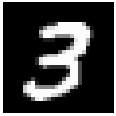

In [ ]:
im3 = x_imgs[7]
show_image(im3);

In [ ]:
top_edge = tensor([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]]).float()

We're going to call this our kernel (because that's what fancy computer vision researchers call these).

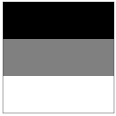

In [ ]:
show_image(top_edge, noframe=False);

The filter will take any window of size 3×3 in our images, and if we name the pixel values like this:

$$\begin{matrix} a1 & a2 & a3 \\ a4 & a5 & a6 \\ a7 & a8 & a9 \end{matrix}$$

it will return $-a1-a2-a3+a7+a8+a9$.

So in this case, a kernel is a in this case it's going to be a rank two tensor. And so let's create a kernel with these values in the three by three matrix rank, two tensor and we could draw what that looks like. Not surprisingly, this looks like a bunch of lines perhaps. Okay, so what would happen if we slide this over , nine pixels over this 28 by 28? Well, what's going to happen is if we've got some the top left, for example, three by three section has these names, then we're going to end up with negative a1 because the top three or negative, right. Negative a1, minus a2 minus a3 the next to exist zero. So that won't do anything. And then plus a7 plus a8 plus a9. Why is that interesting? That's interesting. Well, let's try here. What I've done here is I've grabbed just the first 13 rows and first 23 columns of our image, and I'm actually showing the numbers and also using Gray kind of conditional formatting, if you like, or the equivalent in PANDAS to show this top bit. So we're looking at just this top bit. So what happens if we take rows three, four and five? Remember, this is not inclusive, right? So it's rows three, four and five columns 14,15 , 16 , So we're looking at this these three here. What's that going to give us if we multiply it by this kernel, it gives us a fairly large positive value because the three that we have negatives on is the top, right? Well, they're all zero. And the three that we have positives on there or close to one. So we end up with quite a large number. What about the same columns but four rows 7,8,9  Here the top is all positive and the bottom is all zero. So that means that we're going to get a lot of negative terms. And not surprisingly, that's exactly what we see. This if we do this kind of dot product equivalent, which all you need a numpad to do, that is just an element. My multiplication followed by a sum, right? So that's going to be a quite a large negative number. And so perhaps you're saying what this is doing and maybe you got a hint from the name of the tensor. So we created it, something that is going to find the top edge. All right. So this one is a top edge. So it's a positive and this one is a bottom edge. So it's a negative. So we would like to apply that this kernel to every single three by three section in here. So we could do that by creating a little apply kernel function that takes some particular row in some particular column and some particular tensor as a kernel. And does that multiplication that some that we just saw. So for example, we could replicate this one by calling apply kernel and this here is the center of that three by three grid area. 

In [ ]:
df = pd.DataFrame(im3[:13,:23])
df.style.format(precision=2).set_properties(**{'font-size':'7pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.17,0.41,1.00,0.99,0.99,0.99,0.99,0.99,0.68,0.02,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.54,0.88,0.88,0.98,0.99,0.98,0.98,0.98,0.98,0.98,0.98,0.62,0.05
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.70,0.98,0.98,0.98,0.98,0.99,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.23
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.43,0.98,0.98,0.90,0.52,0.52,0.52,0.52,0.74,0.98,0.98,0.98,0.98,0.23
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.11,0.11,0.09,0.00,0.00,0.00,0.00,0.05,0.88,0.98,0.98,0.67,0.03


In [ ]:
(im3[3:6,14:17] * top_edge).sum()

tensor(2.97)

In [ ]:
(im3[7:10,14:17] * top_edge).sum()

tensor(-2.96)

In [ ]:
def apply_kernel(row, col, kernel): return (im3[row-1:row+2,col-1:col+2] * kernel).sum()

So now we could apply that kernel to every one of the three by three windows in this 28 by 28 image. So we're going to be sliding over like this red bit sliding over here, but we've actually got a 28 by 28 input, not just a five by five input. So to get all of the coordinates, let's just simplify it. To do this five by five, we can go, we can create a list comprehension. We can take i through every value in range five and then for each of those we can take a j for every value in range Five. And so if we just look at that tuple, you can say we get a list of lists containing all of those coordinates. So this is a list comprehension in list comprehension which when you first say it may be surprising or confusing, but it's a really helpful idiom and I certainly recommend getting used to it. Now, what we're going to do is we're not just going to create this tuple, but we're actually going to call applay kernel for each of those. So if we go through from 1 to 27, we'll actually 1 to 26 because 27 is exclusive. So we're going to go through everything from 1 to 26 and then for each of those go through from 1 to 26 again and call apply kernel and that's going to give us the result of applying that convolutional kernel to every one of those coordinates. And there's a result and you can see what it's done as we hoped is it is highlighting the top edges. So yeah, you might find that kind of surprising that it's that that easy to do this kind of image processing. We're literally just doing an element wise multiplication and a sum for each window. Okay. So,that is called a convolution. So we can do another convolution. This time we could do one with the left edge tensor.As You can see looks just a rotated version or transpose version I guess, of our top edge tensor. Here's what it looks like. And so if we apply that kernel, so this time we're going to apply the left edge kernel and so notice here that we're actually passing in a function, right? We're passing in a tensor , It's just a it's just a tensor actually. So we're going to pass in the left edge tensor for the same list Comprehension in a list comprehension. And this time we're getting back on the left edge as it's highlighting all of the left edges in the digit. So yeah, this is basically what's happening here is that a two by two can be looped over an image creating these outputs. Now you'll see here that in the process of doing so, we are losing the outermost pixels of our image. We'll learn about how to fix that later, but just for now, notice that that as we are putting in our three by three through for example, in this five by five, there's only 1 two 3 places that we can put it going across, not five places, because we need some kind of edge. 

In [ ]:
apply_kernel(4,15,top_edge)

tensor(2.97)

<img src="https://github.com/fastai/course22p2/blob/master/nbs/images/chapter9_nopadconv.svg?raw=1" id="nopad_conv" caption="Applying a kernel across a grid" alt="Applying a kernel across a grid" width="400">

In [ ]:
[[(i,j) for j in range(5)] for i in range(5)]

[[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)],
 [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4)],
 [(2, 0), (2, 1), (2, 2), (2, 3), (2, 4)],
 [(3, 0), (3, 1), (3, 2), (3, 3), (3, 4)],
 [(4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]]

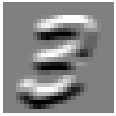

In [ ]:
rng = range(1,27)
top_edge3 = tensor([[apply_kernel(i,j,top_edge) for j in rng] for i in rng])
show_image(top_edge3);

In [ ]:
left_edge = tensor([[-1,0,1],
                    [-1,0,1],
                    [-1,0,1]]).float()

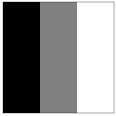

In [ ]:
show_image(left_edge, noframe=False);

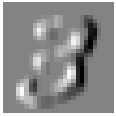

In [ ]:
left_edge3 = tensor([[apply_kernel(i,j,left_edge) for j in rng] for i in rng])
show_image(left_edge3);

<img alt="Result of applying a 3×3 kernel to a 4×4 image" width="782" caption="Result of applying a 3×3 kernel to a 4×4 image (courtesy of Vincent Dumoulin and Francesco Visin)" id="three_ex_four_conv" src="https://github.com/fastai/course22p2/blob/master/nbs/images/att_00028.png?raw=1">

Oops. Somebody pointed out that this is not quite the same. It should be. It should be moved. Now, check this out. If you had an option or alt as you highlight, you can copy, you can copy and paste whole columns at once. Isn't that cool? Yeah. We go. All right. It doesn't change the output match, of course, but it's nice to have a consistent. All right, So that's cool. That's a convolution. And hopefully if you remember back to kind of the Zeiler and Fergus pictures from from lesson one, you might recognize that the kind of first layer of a convolutional network is often looking for kind of edges and gradients and things like that. And this is how, this is how it does it. And then the convolutions on top of convolutions with nonlinear activations between them can combine those into into curves or corners or stuff like that and so on and so forth. Okay, so how do we do this quickly? Because currently this is going to be super, super slow during this in Python. So one of the very earliest or probably the earliest publicly available general purpose deep learning GPU accelerator tape running thing I saw it was called Cafe that was created by somebody called Young Teenager and he actually described what happened where where cafe how cafe went about implementing a fast conversation on a GPU. And basically he said, well I had two months to do it and I had to finish my thesis. And so I ended up doing something where I said, Well, there was some other code out there. Could I ask who you might have come across him and, and Hinton set up a little start up which, which Google bought and that kind of became the start of Google's deep learning, the Google brain. Basically. Codrescu had all this fancy stuff in in his library, but Yuncheng , Oh, I didn't know how to do all that stuff. So I said, Well, I already know how to multiply matrices, so maybe I can convert a convolution into a matrix multiplication. And so that I became known as im2col, 

im2col a way of converting a convolution into a matrix. Multiply. And so actually, I don't know if a suspect young teenager kind of accidentally reinvented it because it actually had been around for a while, even at the point that he was writing his thesis. I believe. So it was actually this is this is the place I believe it was created in this paper.
https://hal.inria.fr/inria-00112631/document


So that was in 2006, which is a while ago. And so this is actually from that paper. And what they describe is, is let's say you are putting this two by two kernel over this, three by three bit of an image. So here you've got this this window needs to match to this part of this window. Right. What you could do is you could unwrap this to 1 2,1 2. 

unroll to here. One, two, one, two. To unroll it like so and you could unroll the kernel here. Yeah. So this is one, two, one one. So this is bit is here. One, two, one one and then you can unroll the kernel one, one, two, two, to here. One, one, two, two. And then once they, they've been moved, flattened out and moved in that way and then you're doing exactly the same thing for this next patch here.2, 0 , 1 , 3 flatten out and put it here if you basically take those kernels and flatten them out in this format, then you end up with a matrix multiply. If you multiply this matrix by this matrix, you'll end up with the output that you want from the convolution. So this is a basically a way of unrolling your kernels and your input features into matrices such as when you do the matrix multiply, you get the right answer. So it's kind of a nifty trick. And so that is called im2col and I guess we're kind of chatting a little bit. Implementing that is kind of boring is just a bunch of copying, intensive manipulation. So I actually haven't done it. Instead, I've linked to a numpy implementation, which is here. And it also part of it is this get indices which is here. And as you can see, it's a little bit tedious with repeats and tiles and re shapes and whatnot. So I'm not going to call it homework, but if you want to practice your tensor indexing manipulation skills, try creating a PyTorch version from scratch. I've got to admit I didn't bother. Instead, 

I used the one that's built into PyTorch and in PyTorch it's called unfold. So if we take our image and PyTorch expects there to be a batch axis and dimension and a channel dimension. So we'll add two unit leading dimensions to it, then we can unfold our input for a three by three and that will give us a 9 by 676 input. And so then we can take that We can take that and then we will make our we will take it out kernal and just flatten it out into a vector. So here changes the shape and minus one just says dump everything into this dimension. So that's going to create a nine long vector length, nine vector. And so now we can do the matrix multiply just like they've done here of the kernel matrix. That's our weights by the unrolled input features. And so that gives us a 676 long. We can then view that as 26 by 26 and we get back as we hoped, our left edge tensor result. And so this is yeah, this is how we can kind of from scratch create a a better implementation of convolutions. The reason I'm cheating I'm allowed to cheat here is because we did actually create convolution from scratch.

So I think that's fair, but it's cool that we can kind of hack out GPU optimized version in the same way that the kind of original Deep Learning library did. So if we use apply kernel, we get nearly 9 milliseconds. If we use unfold with matrix multiply we get 20 microseconds. So that's what about 400 times faster. So that's pretty cool. Now of course we don't have to use unfold and matrix multiply because PyTorch has a copy of covv2d so we can run that. And that interestingly is about the same speed at least on GPU. But this would also work on on, on GPU just as well. Yeah. I'm not sure this will always be the case in this case. It's a pretty small image. I haven't experimented a whole lot to see whereabouts. There's a big difference in space between these. Obviously I always just use conv2d that if there's some more tricky convolution you need to do with some weird thing around channels or dimensions or something. You can always try this unfold trick. It's nice to know it's there. I think. So we could do the same thing for diagonal edges. So here's our diagonal edge kernel or the other diagonal. So if we just grab the first 16 images on our whole batch with all of our kernels at once. So this is a nice optimized thing that we can do. And you end up with your 26 by 26, you've got your four kernels and you've got your 16 images. And so that's summarized here. So that's generally what we're doing to get good GPU acceleration as we're doing a bunch of kernels and a bunch of images all at once across across all of their pixels. And so yeah, we go, that's what happens when we take a look at our various kernels for a particular image left edge, I guess, top edge and then diagonal, top left and top right. Okay, so that is optimized convolutions on and that works just as well in CPU or GPU. 



Obviously GPU will be faster if you have one. Now how do we deal with the problem that way? Losing one pixel on each side? What we can do is we can add something called padding and padding. What we basically do is rather than starting our window here, we start at a right over here and we actually would be up one as well. And so these three on the left here, we just take the input for each of those as zero. So we're basically just assuming that they're all zero. I mean, that's there's other options we could choose. We could assume they're the same as the one next to them

There's various things we can do, but the simplest and the one we normally do is just assume that they're zero. So now so let's say, for example, this is this is called one pixel padding. 

 we're just going to treated at zero. 
 

 
 So generally odd numbered edge sized kernels are easier to deal with to make sure you end up with the same thing. You start with. Okay, so yeah. So as it says here with you've got an odd numbered size case by case size kernel, then case truncate divide two, that's what segments will give you the right size. And so another trick you can do is you don't always have to just move your window across by one each time. You could move it by a different amount. Each time the amount you move it by is called the stride. So, for example, here's a case of doing a stride two so stride two padding one. So we start out here and then we jump across two and then we jump across to then then we go to the next tray. 
 
 So that's called a stride to convolution stride to convoluted ends are handy because they actually reduce the dimensionality of your input by a factor of two. And that's actually what we want to do a lot. For example, with an auto encoder, we want to do that. And in fact, for most classification architectures we do exactly that. We keep on reducing the kind of the grid size by a factor of two again and again and again, using stride to compilations with padding of one. So that strides in padding. So let's go ahead and create a convnet using these approaches. So we're going to put get our size of our training set. This is all the same as before a number of categories than per digit size of our hidden layer. So right previously with our sequential linear models with our MLPs, we basically went from size from the number of pixels to the number of hidden, and then relu and then the number of hidden to the number of outputs. So here's the equivalent with a convolution.



### Convolutions in PyTorch

In [ ]:
import torch.nn.functional as F
import torch

What to do if you have [2 months to complete your thesis](https://github.com/Yangqing/caffe/wiki/Convolution-in-Caffe:-a-memo)? Use [im2col](https://hal.inria.fr/inria-00112631/).

![image.png](attachment:image.png)

Here's a sample [numpy implementation](https://github.com/3outeille/CNNumpy/blob/5394f13e7ed67a808a3e39fd381f168825d65ff5/src/fast/utils.py#L360).

In [ ]:
inp = im3[None,None,:,:].float()
inp_unf = F.unfold(inp, (3,3))[0]
inp_unf.shape

torch.Size([9, 676])

In [ ]:
w = left_edge.view(-1)
w.shape

torch.Size([9])

In [ ]:
out_unf = w@inp_unf
out_unf.shape

torch.Size([676])

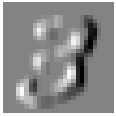

In [ ]:
out = out_unf.view(26,26)
show_image(out);

In [ ]:
%timeit -n 1 tensor([[apply_kernel(i,j,left_edge) for j in rng] for i in rng]);

13.5 ms ± 353 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit -n 100 (w@F.unfold(inp, (3,3))[0]).view(26,26);

56.2 µs ± 16.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit -n 100 F.conv2d(inp, left_edge[None,None])

The slowest run took 7.39 times longer than the fastest. This could mean that an intermediate result is being cached.
25.4 µs ± 29.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
diag1_edge = tensor([[ 0,-1, 1],
                     [-1, 1, 0],
                     [ 1, 0, 0]]).float()

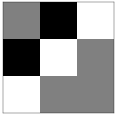

In [ ]:
show_image(diag1_edge, noframe=False);

In [ ]:
diag2_edge = tensor([[ 1,-1, 0],
                     [ 0, 1,-1],
                     [ 0, 0, 1]]).float()

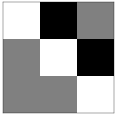

In [ ]:
show_image(diag2_edge, noframe=False);

In [ ]:
xb = x_imgs[:16][:,None]
xb.shape

torch.Size([16, 1, 28, 28])

In [ ]:
edge_kernels = torch.stack([left_edge, top_edge, diag1_edge, diag2_edge])[:,None]
edge_kernels.shape

torch.Size([4, 1, 3, 3])

In [ ]:
batch_features = F.conv2d(xb, edge_kernels)
batch_features.shape

torch.Size([16, 4, 26, 26])

The output shape shows we gave 64 images in the mini-batch, 4 kernels, and 26×26 edge maps (we started with 28×28 images, but lost one pixel from each side as discussed earlier). We can see we get the same results as when we did this manually:

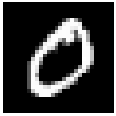

In [ ]:
img0 = xb[1,0]
show_image(img0);

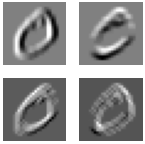

In [ ]:
show_images([batch_features[1,i] for i in range(4)])

### Strides and Padding

With appropriate padding, we can ensure that the output activation map is the same size as the original image.

<img src="https://github.com/fastai/course22p2/blob/master/nbs/images/chapter9_padconv.svg?raw=1" id="pad_conv" caption="A convolution with padding" alt="A convolution with padding" width="600">

With a 5×5 input, 4×4 kernel, and 2 pixels of padding, we end up with a 6×6 activation map.

<img alt="A 4×4 kernel with 5×5 input and 2 pixels of padding" width="783" caption="A 4×4 kernel with 5×5 input and 2 pixels of padding (courtesy of Vincent Dumoulin and Francesco Visin)" id="four_by_five_conv" src="https://github.com/fastai/course22p2/blob/master/nbs/images/att_00029.png?raw=1">

If we add a kernel of size `ks` by `ks` (with `ks` an odd number), the necessary padding on each side to keep the same shape is `ks//2`.

We could move over two pixels after each kernel application. This is known as a *stride-2* convolution.

<img alt="A 3×3 kernel with 5×5 input, stride-2 convolution, and 1 pixel of padding" width="774" caption="A 3×3 kernel with 5×5 input, stride-2 convolution, and 1 pixel of padding (courtesy of Vincent Dumoulin and Francesco Visin)" id="three_by_five_conv" src="https://github.com/fastai/course22p2/blob/master/nbs/images/att_00030.png?raw=1">

Now the problem is that you can't just do that because the output is not now ten probabilities for each item in our batch, but it's ten probabilities for each item in our batch for each of 28 by 28 pixels, because we don't even have a stride or anything. So you can't just use the same simple approach that we had for MLP. We have to be a bit more careful. So to make life easier, let's create a little conv function that does a conv2d  with a stride of two. Optionally followed by an activation. So if act is true, we will add in every relu activation. So this is going to either return conv2d or a little sequential containing a conv2d followed by a relu. And so now we can create a cnn from, you know, from scratch. That's the sequential model. And so since activation is true by default, this is going to take out 28 by 28 image starting with one channel and creating an output of four channels. So this is the number of in this is the number of filters. Sometimes we'll say filters to describe the number of kind of channels that our convolution has. That's the number of outputs. And it's very similar to the idea of the number of outputs in a linear layer. This is the number of outputs in your convolution. So what I like to do when I create stuff like this is I add a little comment just to remind myself what is my grid size after this. So I had a 28 by 28 input. So then I've then put it through a stride to conv, so the output of this will be 14 by 14. So then we'll do the same thing again, but this time we'll go from a four channel input to an eight channel output and then from 8 to 16. So by this point we're now down to a 4x4 and then down to a two by two. And then finally we're down to a one by one. So on the very last layer, we want add an activation and the very last layer is going to create ten outputs. And since we're now down to a one by one, we can just call flatten and that's going to remove those unnecessary unit axes. So if we take that pop mini batch through it, we end up with exactly what we want a 16 by ten. So for each of our 16 images, we've got  ten probabilities of each possible digit. So if we take our training set and make it into 28 by 28 images and we do the same thing for our validation set, and then we create two data sets, one for each which are called train data set and valid data set. And we're now going to train this on the GPU.

## Creating the CNN

In [ ]:
n,m = x_train.shape
c = y_train.max()+1
nh = 50

In [ ]:
model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10))

In [ ]:
broken_cnn = nn.Sequential(
    nn.Conv2d(1,30, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(30,10, kernel_size=3, padding=1)
)

In [ ]:
broken_cnn(xb).shape

torch.Size([16, 10, 28, 28])

In [ ]:
#|export
def conv(ni, nf, ks=3, stride=2, act=True):
    res = nn.Conv2d(ni, nf, stride=stride, kernel_size=ks, padding=ks//2)
    if act: res = nn.Sequential(res, nn.ReLU())
    return res

Refactoring parts of your neural networks like this makes it much less likely you'll get errors due to inconsistencies in your architectures, and makes it more obvious to the reader which parts of your layers are actually changing.

In [ ]:
simple_cnn = nn.Sequential(
    conv(1 ,4),            #14x14
    conv(4 ,8),            #7x7
    conv(8 ,16),           #4x4
    conv(16,16),           #2x2
    conv(16,10, act=False), #1x1
    nn.Flatten(),
)

You now if you've got a mac, you can use a device called Apple. If you've got an Apple Silicon Mac, you've got a device called NPS, which is going to use the know Macs GPU here or if you've got it in video, you can use Cuda, which will use your and video creators, you know, ten times or more, possibly much more faster than a mac. So you definitely want to use in video if you can, but if you just running it on a laptop or whatever, you can use amps. So basically you're going to know what device to use. Do we want to use Coda or amps? You can check if you can check torchlight back backhands that is available to see if you're running on a mac with amps you can check 

torch.backends.mps.is_available()

.It is available to see if you've got an in video GPU, in which case you've got CUDA. And if you've got neither, of course you'll have to use the CPU to do computation. So I've created a little function to device which takes a tensor or a dictionary or a list of tensors or whatever, and a device to move it to. And it just goes through and moves everything onto that device. Or if it's a dictionary, a dictionary of things, value has moved onto that device that has a handy little function. And so we can create a custom collate function which calls the PyTorch default collation function and then puts those tensors onto our device. And so with that, we've now got enough to run train this neural net on the GPU. You we created this get_dls function in the last lesson. So we're going to use that passing in the datasets that we just created and our default collation function, we're going to create our optimizer using our CNN's parameters and then we call fit(), now fit for a member that we also created in our last lesson and it's done. Yeah, it's really, it's a lot less code than last time I ran it. I don't know if I've changed something weird. Let's say now. There we go. 

I must have done something weird. Okay, so I then what I did then was I reduced the learning rate by a factor of four and ran it again. 



In [ ]:
simple_cnn(xb).shape

torch.Size([16, 10])

In [ ]:
x_imgs = x_train.view(-1,1,28,28)
xv_imgs = x_valid.view(-1,1,28,28)
train_ds,valid_ds = Dataset(x_imgs, y_train),Dataset(xv_imgs, y_valid)

In [ ]:
#|export
def_device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'

def to_device(x, device=def_device):
    if isinstance(x, torch.Tensor): return x.to(device)
    if isinstance(x, Mapping): return {k:v.to(device) for k,v in x.items()}
    return type(x)(to_device(o, device) for o in x)

def collate_device(b): return to_device(default_collate(b))

In [ ]:
from torch import optim

bs = 256
lr = 0.4
train_dl,valid_dl = get_dls(train_ds, valid_ds, bs, collate_fn=collate_device)
opt = optim.SGD(simple_cnn.parameters(), lr=lr)

In [ ]:
loss,acc = fit(5, simple_cnn.to(def_device), F.cross_entropy, opt, train_dl, valid_dl)

0 2.2963203880310057 0.10639999992847443
1 0.35034381108283996 0.8865999997138977
2 0.2884100193500519 0.9101999996185303
3 0.3795499787807465 0.8783999994277955
4 0.14102031185626984 0.957599999332428


And eventually, yeah, I got to a fairly similar accuracy to what we did on our multi on our MLP. So yeah, we've got a convolutional network working. I think that's pretty encouraging and it's nice that to train it, we didn't have to write much code right? We were able to use code that we had already built. We were able to use the dataset class that we made to get_dls function that we made and the fit function that we made. And you know, because those things are written in a fairly general way, they work just as well for conv net as they did for an MLP. Nothing had to change. So that was nice. Notice we had to take the model and put it on the device as well. So that will go through and basically put all of the tensors that are in that model onto the MPS or CUDA  device, if appropriate. So if we've got a batch size of 64 and as we do one channel channel, height width. So normally this is referred to as NCW, so n generally when you see N in a in a paper or whatever, in this way it's referring to the batch size and being the number that's the mnemonic, the number of items in the batch C is the number of channels height by width, and W. TensorFlow doesn't use that TensorFlow uses an NHWC So we generally call these that channels last since channels are at the and this one we normally call channels first. Now of course it's not actually channels first, it's actually channel second, but we ignore the batch bit 

in some models, particularly some more modern models. It turns out the channels last is faster. So PyTorch has recently added support for channels last. And so you'll see that being used more and more as well. 

Yeah, we go. All right. So a couple of comments and questions from our chat. The first is Sam Watkins pointing out that where we've actually had a bit of a win here, which is that the number of parameters now CNN is is pretty small by comparison. So the of in the MLP version, the number of parameters is equal to basically the size of this matrix. Right. So M times and NH, plus the number in this, which will be an H times ten. And you know something that at some point we probably should do is actually create something that allows us to automatically calculate the number of parameters. And I'm ignoring the bias there. Of course, let's say what would be a good way to do that? Maybe np.product. Yeah. Okay. So what we could do, what we could do is just calculate this automatically by doing a little list comprehension here.

So there's the number of parameters across all of the different layers. So both bias and weights. And then we could, I guess, just well, we could just use well, let's use pytouch so we could turn that into a tensor and sum it up. So that's the number in our MLP. And then the number in our simple CNN. So that's pretty cool. We've gone down from 40000 to 5000 and got about the same number there. Oh, thank you, Jonathan. Jonathan's reminding me that there's a better way than np.product shape, which is just to say I dot number of elements num of element. Very nice. 

Now, one person asked a very good question, which is I thought convolutional neural networks can handle any sized image and actually know this convolutional network cannot handle any sized image. This convolutional neural network only handles images that once they go through these tried to convs end up with a one by one because otherwise you can't  dot Flatten it and end up with 16 by ten. So we will learn how to create comv nets that can handle any sized input. But there's nothing particularly about a net that necessitates that it has to be any sized input that it can handle. Okay. 

So just let's briefly finish this section off by talking about this. Yeah. That this well, particularly on to talk about the idea of receptive field, consider this. Yeah. One input Channel four output. Channel three by three kernal. Right. So that's just here just to show you what we're doing here conv one. Well actually so simple. See it in simple CNN. This is the model we created. Remember, is like a sequential model containing sequential models because that's how our current function worked. So simple. CNN zero is our first layer. It contains both conv and a relu so I simple CNN zero zero is the actual conv. So if we grab that whole conf one, it's a four by one, by three by three. So number of outputs, number of input channels and height by weight for that kernal and then it's got its bias as well. So that's how we could kind of deconstruct what's going on with our weight matrices or our parameters inside a convolution. Now I'm going to switch over to Excel.





In [ ]:
opt = optim.SGD(simple_cnn.parameters(), lr=lr/4)
loss,acc = fit(5, simple_cnn.to(def_device), F.cross_entropy, opt, train_dl, valid_dl)

0 0.10183437039852142 0.9675999994277954
1 0.10473719484806061 0.9674999994277954
2 0.10602079322338104 0.9673999995231628
3 0.09614700574874878 0.9709999995231628
4 0.09545752574205399 0.9696999994277954


### Understanding Convolution Arithmetic

In an input of size `64x1x28x28` the axes are `batch,channel,height,width`. This is often represented as `NCHW` (where `N` refers to batch size). Tensorflow, on the other hand, uses `NHWC` axis order (aka "channels-last"). Channels-last is faster for many models, so recently it's become more common to see this as an option in PyTorch too.

We have 1 input channel, 4 output channels, and a 3×3 kernel.

In [ ]:
simple_cnn[0][0]

Conv2d(1, 4, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))

In [ ]:
conv1 = simple_cnn[0][0]
conv1.weight.shape

torch.Size([4, 1, 3, 3])

In [ ]:
conv1.bias.shape

torch.Size([4])

The *receptive field* is the area of an image that is involved in the calculation of a layer. *conv-example.xlsx* shows the calculation of two stride-2 convolutional layers using an MNIST digit. Here's what we see if we click on one of the cells in the *conv2* section, which shows the output of the second convolutional layer, and click *trace precedents*.

<img alt="Immediate precedents of conv2 layer" width="308" caption="Immediate precedents of Conv2 layer" id="preced1" src="https://github.com/fastai/course22p2/blob/master/nbs/images/att_00068.png?raw=1">

The blue highlighted cells are its *precedents*—that is, the cells used to calculate its value. These cells are the corresponding 3×3 area of cells from the input layer (on the left), and the cells from the filter (on the right). Click *trace precedents* again:

<img alt="Secondary precedents of conv2 layer" width="601" caption="Secondary precedents of Conv2 layer" id="preced2" src="https://github.com/fastai/course22p2/blob/master/nbs/images/att_00069.png?raw=1">

In this example, we have just two convolutional layers. We can see that a 7×7 area of cells in the input layer is used to calculate the single green cell in the Conv2 layer. This is the *receptive field*

The deeper we are in the network (specifically, the more stride-2 convs we have before a layer), the larger the receptive field for an activation in that layer.

## Color Images

A colour picture is a rank-3 tensor:

In [ ]:
from torchvision.io import read_image

<img src="https://github.com/fastai/course22p2/blob/master/nbs/images/chapter9_rgbconv.svg?raw=1" id="rgbconv" caption="Convolution over an RGB image" alt="Convolution over an RGB image" width="550">